In [1]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

from cancer_estimator_model import datasets

# Carregar o dataset 
df = datasets.get_integrated_dataset()
display(df.head(10).T)
df.info()

,0,1,2,3,4,5,6,7,8,9
AGE,69.0,74.0,59.0,63.0,63.0,75.0,52.0,51.0,68.0,53.0
SMOKING,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
YELLOW_FINGERS,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
ANXIETY,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
PEER_PRESSURE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
CHRONIC_DISEASE,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
FATIGUE,1,1,1,0,0,1,1,1,1,0
ALLERGY,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
WHEEZING,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
ALCOHOL_CONSUMING,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318109 entries, 0 to 318108
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGE                    1309 non-null    float64
 1   SMOKING                1309 non-null    float64
 2   YELLOW_FINGERS         1309 non-null    float64
 3   ANXIETY                309 non-null     float64
 4   PEER_PRESSURE          309 non-null     float64
 5   CHRONIC_DISEASE        309 non-null     float64
 6   FATIGUE                318109 non-null  int64  
 7   ALLERGY                309 non-null     float64
 8   WHEEZING               1309 non-null    float64
 9   ALCOHOL_CONSUMING      309 non-null     float64
 10  COUGHING               318109 non-null  int64  
 11  SHORTNESS_OF_BREATH    318109 non-null  int64  
 12  SWALLOWING_DIFFICULTY  318109 non-null  int64  
 13  CHEST_PAIN             318109 non-null  int64  
 14  LUNG_CANCER_RISK       1309 non-null

In [3]:
# Dividir o conjunto de dados em features (X) e variável alvo (y)
X = df.drop(columns=['LUNG_CANCER_RISK','COUNTRY'])
y = df['LUNG_CANCER_RISK']

# Tratar valores ausentes nas colunas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    X[col].fillna('missing', inplace=True)

# Dividir o conjunto de dados em train and test
X_train = X[X.SOURCE != 3]  # dropa os dados que tem a source 3 (dataset covid)
X_test = X[X.SOURCE == 3]   # coloca somente os dados com a source 3 no teste (dataset covid)
y_train = y[X.SOURCE != 3].astype(float)  # dropa os dados que tem a source 3 (dataset covid) na target



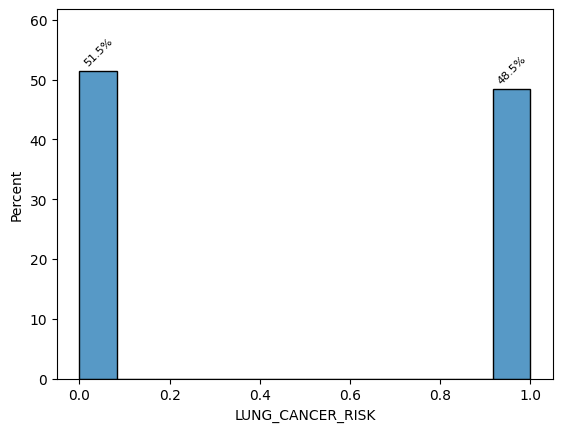

In [4]:
def plot_y_distribution(y):
    # Criando distribuição da variável resposta estimada
    ax = sns.histplot(y, stat='percent')
    
    
    # add annotations
    for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=45, padding=2)
        
        ax.margins(y=0.2)
    plt.show()
plot_y_distribution(y_train)

# Cross validation with catboost regression

0:	learn: 0.4681908	total: 144ms	remaining: 1m 12s
100:	learn: 0.0806524	total: 281ms	remaining: 1.11s
200:	learn: 0.0503657	total: 445ms	remaining: 662ms
300:	learn: 0.0365657	total: 575ms	remaining: 380ms
400:	learn: 0.0308912	total: 704ms	remaining: 174ms
499:	learn: 0.0271844	total: 823ms	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       169
         1.0       0.97      0.98      0.97       159

    accuracy                           0.98       328
   macro avg       0.98      0.98      0.98       328
weighted avg       0.98      0.98      0.98       328



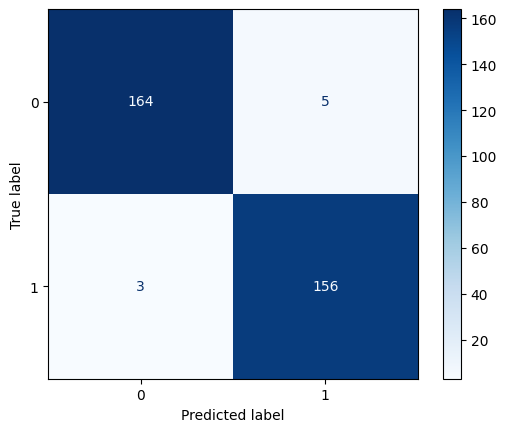

0:	learn: 0.4640483	total: 1.91ms	remaining: 952ms
100:	learn: 0.0954669	total: 146ms	remaining: 577ms
200:	learn: 0.0557088	total: 282ms	remaining: 420ms
300:	learn: 0.0380651	total: 414ms	remaining: 274ms
400:	learn: 0.0300015	total: 577ms	remaining: 142ms
499:	learn: 0.0264636	total: 729ms	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       168
         1.0       0.99      0.98      0.99       159

    accuracy                           0.99       327
   macro avg       0.99      0.99      0.99       327
weighted avg       0.99      0.99      0.99       327



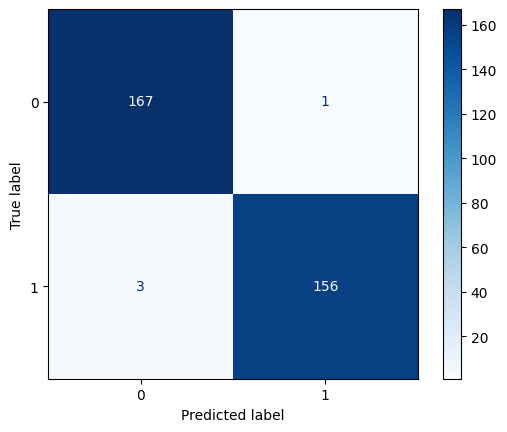

0:	learn: 0.4645797	total: 1.34ms	remaining: 671ms
100:	learn: 0.0889680	total: 136ms	remaining: 536ms
200:	learn: 0.0435345	total: 283ms	remaining: 420ms
300:	learn: 0.0235963	total: 500ms	remaining: 330ms
400:	learn: 0.0147241	total: 639ms	remaining: 158ms
499:	learn: 0.0104990	total: 775ms	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       168
         1.0       0.95      0.97      0.96       159

    accuracy                           0.96       327
   macro avg       0.96      0.96      0.96       327
weighted avg       0.96      0.96      0.96       327



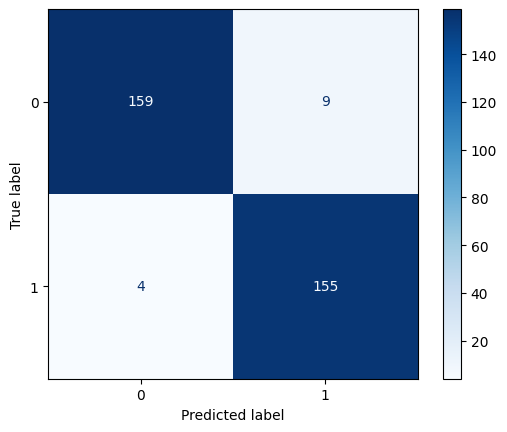

0:	learn: 0.4685930	total: 1.14ms	remaining: 567ms
100:	learn: 0.0658814	total: 192ms	remaining: 757ms
200:	learn: 0.0321574	total: 383ms	remaining: 569ms
300:	learn: 0.0186738	total: 517ms	remaining: 342ms
400:	learn: 0.0113061	total: 698ms	remaining: 172ms
499:	learn: 0.0076574	total: 843ms	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       169
         1.0       0.97      0.97      0.97       158

    accuracy                           0.97       327
   macro avg       0.97      0.97      0.97       327
weighted avg       0.97      0.97      0.97       327



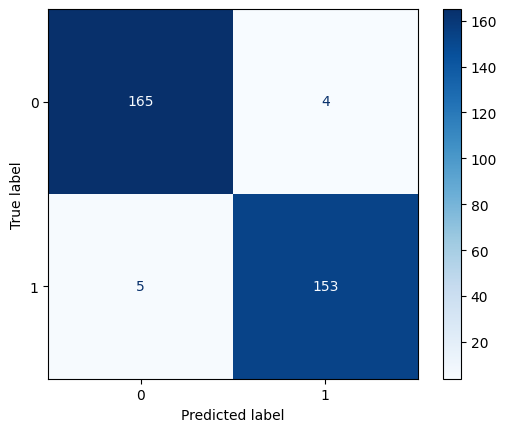

Pontuações de validação cruzada (F1): [0.975      0.98734177 0.95975232 0.97142857]
Média e desvio padrão das pontuações de validação cruzada: 0.9734±0.0098


In [5]:
# Criar o modelo CatBoostRegressor
model = CatBoostRegressor(
    iterations=500, 
    depth=6,
    eval_metric="RMSE",  # Métrica apropriada para regressão
    learning_rate=0.1, 
    cat_features=categorical_cols,  # Passar as colunas categóricas
    verbose=100
)

# Definir o número de dobras para a validação cruzada
n_folds = 4

# Definir um limiar de decisão para converter previsões contínuas em classes
decision_threshold = 0.6

def custom_scoring(y_true, y_pred):
    y_pred_class = (y_pred >= decision_threshold).astype(int)  # Converter previsões contínuas para classes com base no limiar
    report = classification_report(y_true, y_pred_class)
    cm = confusion_matrix(y_true, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    print(report)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    return f1_score(y_true, y_pred_class)

# Criar o objeto de validação cruzada estratificada
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Realizar a validação cruzada estratificada
scores = cross_val_score(
    model, X_train, y_train, 
    cv=skf, scoring=make_scorer(custom_scoring)
)

rscores = np.round(scores, decimals=4)
mean = np.round(np.mean(scores), decimals=4)
std = np.round(np.std(scores), decimals=4)
# Exibir as pontuações de validação cruzada
print("Pontuações de validação cruzada (F1):", scores)
# Exibir a média das pontuações de validação cruzada
print(f"Média e desvio padrão das pontuações de validação cruzada: {mean}±{std}")

# Evaluating model in COVID dataset (300k+ samples)

0:	learn: 0.4639966	total: 1.37ms	remaining: 683ms
100:	learn: 0.0892585	total: 183ms	remaining: 723ms
200:	learn: 0.0546064	total: 334ms	remaining: 497ms
300:	learn: 0.0382046	total: 485ms	remaining: 320ms
400:	learn: 0.0304764	total: 643ms	remaining: 159ms
499:	learn: 0.0257253	total: 820ms	remaining: 0us


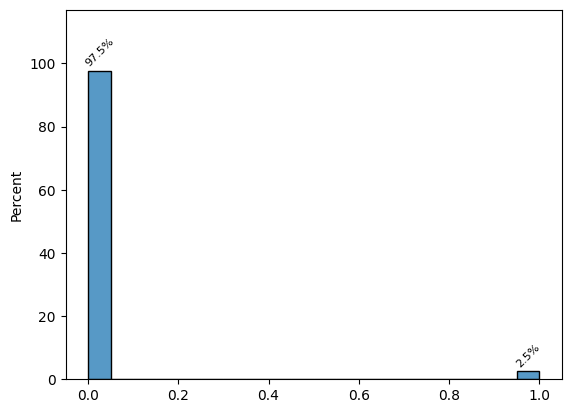

In [6]:
# Ajustar o modelo aos dados de treino completos
model.fit(X_train, y_train)

# Fazer a predição no conjunto de dados de teste
y_pred = model.predict(X_test)
y_pred_class = (y_pred >= decision_threshold).astype(int)  # Converter previsões contínuas para classes

plot_y_distribution(y_pred_class)

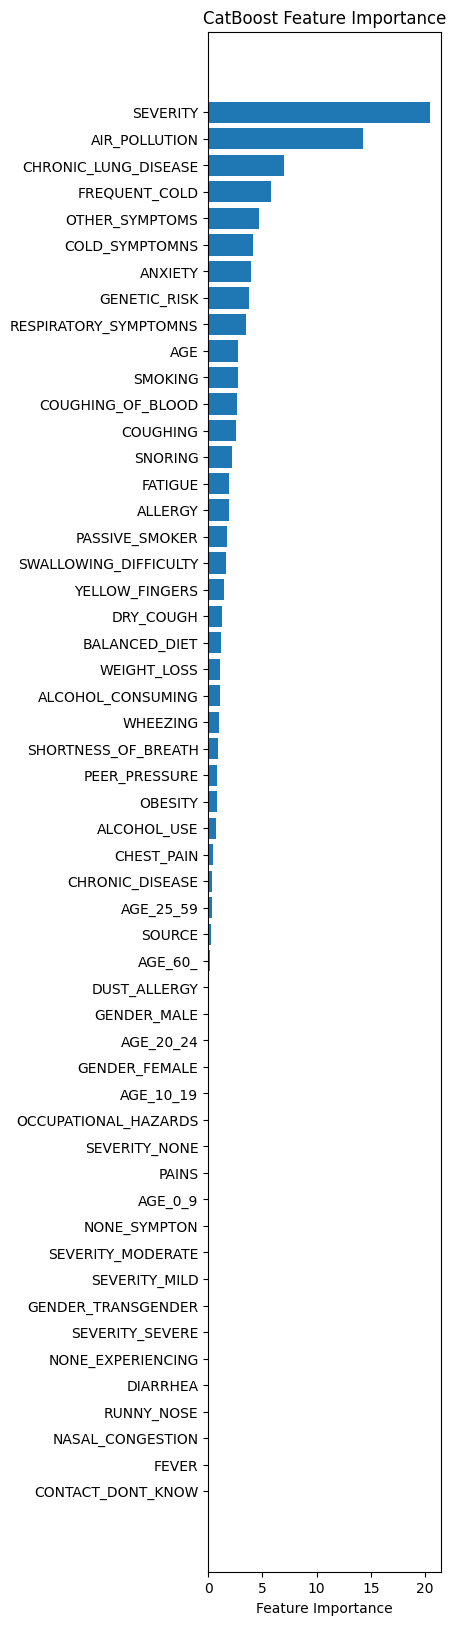

In [7]:
# plot feature importance
feature_importance = model.get_feature_importance(type='FeatureImportance')
feature_names = model.feature_names_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(3,20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()